<a href="https://colab.research.google.com/github/okana2ki/intro-to-DS/blob/main/DS13_3v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize-matplotlib  # 日本語対応（グラフ中で日本語が表示できるようにする）

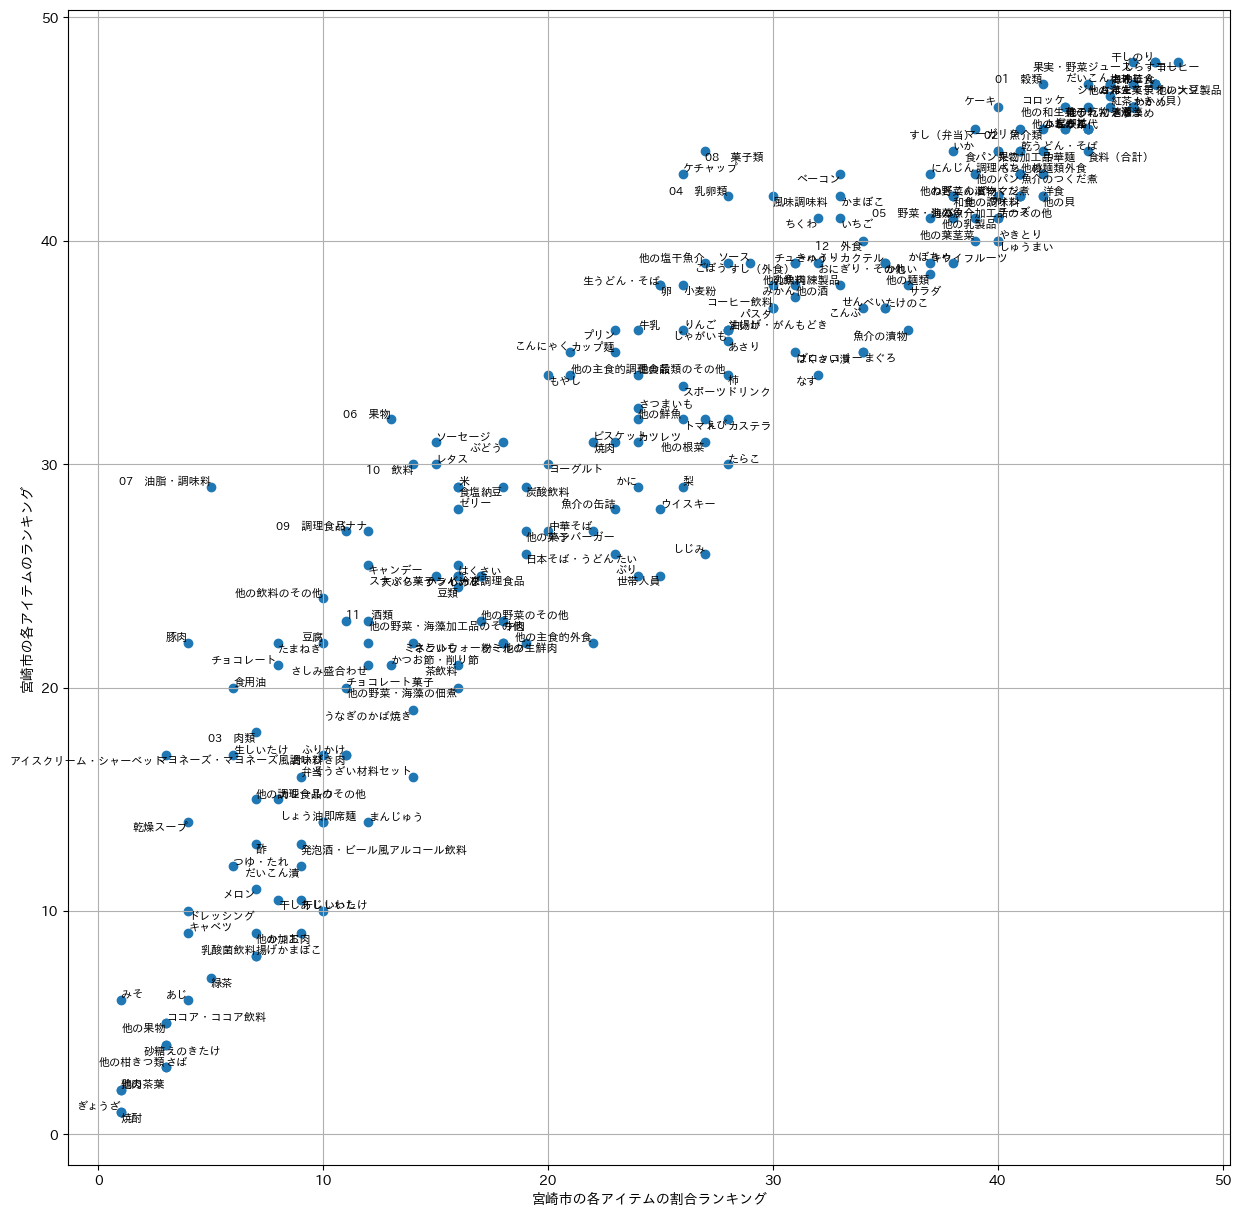

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応（グラフ中で日本語が表示できるようにする）

url = "https://www.nstac.go.jp/sys/files/SSDSE-C-2023.csv"
df = pd.read_csv(url, header=[0,1], encoding="shift_jis")
# print(df)

# 数値データ列だけを対象に(numeric_only=True)、列ごとに降順でランキング
df_rank = df.rank(numeric_only=True, ascending=False)
# print(df_rank)

# df_city = df[[('City','市')]]  # 上記のランキングには市の列が含まれないので、別途、市の列を抽出
# print(df_city)
# 市のDataFrameとランキングのDataFrameを連結→市の列を含むランキングが完成
# df_city_rank = pd.concat([df_city, df_rank], axis=1)
# print(df_city_rank)

df_miyazaki_rank = df_rank[45:46]  # 45行の宮崎市を抽出
# print(df_miyazaki_rank)

dfr = df.copy()  # 割合で置き換えたデータを格納するDataFrame dfrを用意
for column_name, item in dfr.iloc[:,5:229].items():  # 5列目から228列目までを割合に書き換えるループ
  dfr[column_name] = dfr[column_name] / dfr[('LB00','食料（合計）')]
# print(dfr)

# 数値データ列だけを対象に(numeric_only=True)、列ごとに降順でランキング
dfr_rank = dfr.rank(numeric_only=True, ascending=False)
# print(dfr_rank)

dfr_miyazaki_rank = dfr_rank[45:46]  # 45行の宮崎市を抽出

plt.figure(figsize=(15, 15))
x = dfr_miyazaki_rank.iloc[0]
# y = df_miyazaki_rank.iloc[0, 1:]  # 1行目の市の列を除いたデータを抽出
y = df_miyazaki_rank.iloc[0]
plt.scatter(x,y) # 散布図

# 各データ点にラベルを付ける
# for i, txt in enumerate(df.columns[5:229]):
#     plt.annotate(txt[1], (x[i], y[i]), fontsize=8, ha='left', va='bottom')

# 各データ点にラベルを付ける
# ラベルが重なる可能性を減らすため、周期４で４通りの位置に切り替える
# ４通りの表示位置をリストに格納
ha_options = ['right', 'left', 'right', 'left']
va_options = ['top', 'top', 'bottom', 'bottom']

# 表示位置を切り替えながらラベルを付ける
for i, txt in enumerate(df.columns[5:229]):
    ha = ha_options[i % 4]  # Cycle through horizontal alignment options
    va = va_options[i % 4]  # Cycle through vertical alignment options
    # plt.annotate(txt[1], (x[i], y[i]), fontsize=8, ha=ha, va=va)
    # Shifting the text labels by 2 positions to the left to match the correct data points
    plt.annotate(df.columns[i + 3][1], (x[i], y[i]), fontsize=8, ha=ha, va=va)

    # 文字が重なってしまう都道府県名の表示位置を調整
    # if city[i] in ['神戸市', '千葉市', '徳島市', '長崎市', '鹿児島市', '高松市', '宇都宮市', '名古屋市']:
    #     plt.text(x[i], y[i], city[i], ha='left', va='bottom')
    # else:
    #     plt.text(x[i], y[i], city[i], ha='right', va='bottom')

plt.xlabel('宮崎市の各アイテムの割合ランキング')
plt.ylabel('宮崎市の各アイテムのランキング')
plt.grid()
plt.show()